In [3]:
import numpy as np
import cv2
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
def face_extractor(img):
    faces = face_classifier.detectMultiScale(img,1.3,5)
    if faces is ():
        return None
    for(x,y,w,h) in faces:
          cropped_face = img[y:y+h , x:x+w]
    return  cropped_face
cap = cv2.VideoCapture(0)
count = 0
while True:
        ret,frame = cap.read()
        if face_extractor(frame) is not None:
            count +=1
            face = cv2.resize(face_extractor(frame), (224,224))
            file_name_path = 'dataset/train/teja/'  + str(count) + '.jpg'
            cv2.imwrite(file_name_path , face)
            cv2.putText(face, str(count) , (100,100) , cv2.FONT_HERSHEY_COMPLEX , 1, (0,255,0) , 2)
            cv2.imshow('face cropper',face)
        else:
            print("Face not found")
            pass
        if cv2.waitKey(1) == 13 or count == 140:
            break
cap.release()
cv2.destroyAllWindows()
print("Sample Collection Completed")

<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\kavya\AppData\Local\Temp\ipykernel_16648\4121878038.py:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not f

In [1]:
import tensorflow as tf
#import all necessary layers
from tensorflow.keras.layers import Input, DepthwiseConv2D
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras.layers import ReLU, AvgPool2D, Flatten, Dense
from tensorflow.keras import Model
# MobileNet block
def mobilnet_block (x, filters, strides):
    
    x = DepthwiseConv2D(kernel_size = 3, strides = strides, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv2D(filters = filters, kernel_size = 1, strides = 1)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    return x
#stem of the model
input = Input(shape = (224,224,3))
x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(input)
x = BatchNormalization()(x)
x = ReLU()(x)
# main part of the model
x = mobilnet_block(x, filters = 64, strides = 1)
x = mobilnet_block(x, filters = 128, strides = 2)
x = mobilnet_block(x, filters = 128, strides = 1)
x = mobilnet_block(x, filters = 256, strides = 2)
x = mobilnet_block(x, filters = 256, strides = 1)
x = mobilnet_block(x, filters = 512, strides = 2)
for _ in range (5):
     x = mobilnet_block(x, filters = 512, strides = 1)
x = mobilnet_block(x, filters = 1024, strides = 2)
x = mobilnet_block(x, filters = 1024, strides = 1)
x = AvgPool2D (pool_size = 7, strides = 1, data_format='channels_first')(x)
output = Dense (units = 1000, activation = 'softmax')(x)
model = Model(inputs=input, outputs=output)
model.summary()
#plot the model
# tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_dtype=False,show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 32)     128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 112, 112, 32)      0         
                                                                 
 depthwise_conv2d (Depthwise  (None, 112, 112, 32)     320       
 Conv2D)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 32)     128   

                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 512)       262656    
                                                                 
 batch_normalization_16 (Bat  (None, 14, 14, 512)      2048      
 chNormalization)                                                
                                                                 
 re_lu_16 (ReLU)             (None, 14, 14, 512)       0         
                                                                 
 depthwise_conv2d_8 (Depthwi  (None, 14, 14, 512)      5120      
 seConv2D)                                                       
                                                                 
 batch_normalization_17 (Bat  (None, 14, 14, 512)      2048      
 chNormalization)                                                
                                                                 
 re_lu_17 (ReLU)             (None, 14, 14, 512)       0         
          

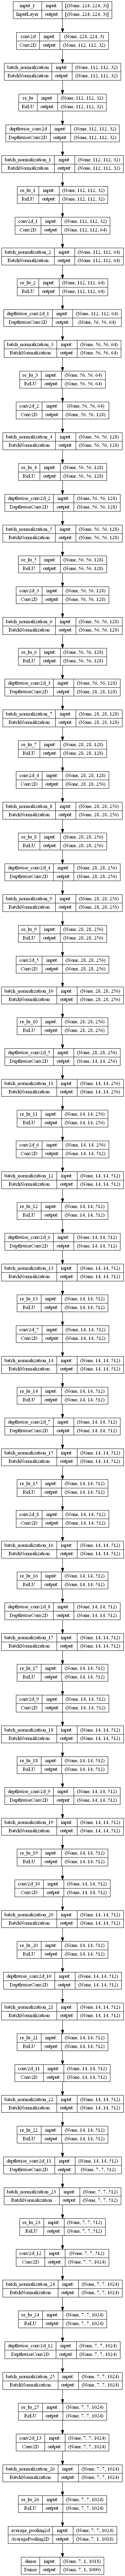

In [2]:
import keras
import pydot
import pydotplus
from pydotplus import graphviz
from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [1]:
from keras.applications import MobileNet

# MobileNet was designed to work on 224 x 224 pixel input images sizes
img_rows, img_cols = 224, 224 

# Re-loads the MobileNet model without the FC layers
MobileNet = MobileNet(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze all the layers so that we don't have to train all the pre-trained layers and tune only the last ones. 
# Layers are set to trainable as True by default
for layer in MobileNet.layers:
    layer.trainable = False
    
# Let's print our layers 
for (i,layer) in enumerate(MobileNet.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)
def lw(bottom_model, num_classes):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.models import Model

# Set our class number to 3 (Young, Middle, Old)
num_classes = 3

FC_Head = lw(MobileNet, num_classes)

model = Model(inputs = MobileNet.input, outputs = FC_Head)

# print(model.summary())

0 InputLayer False
1 Conv2D False
2 BatchNormalization False
3 ReLU False
4 DepthwiseConv2D False
5 BatchNormalization False
6 ReLU False
7 Conv2D False
8 BatchNormalization False
9 ReLU False
10 ZeroPadding2D False
11 DepthwiseConv2D False
12 BatchNormalization False
13 ReLU False
14 Conv2D False
15 BatchNormalization False
16 ReLU False
17 DepthwiseConv2D False
18 BatchNormalization False
19 ReLU False
20 Conv2D False
21 BatchNormalization False
22 ReLU False
23 ZeroPadding2D False
24 DepthwiseConv2D False
25 BatchNormalization False
26 ReLU False
27 Conv2D False
28 BatchNormalization False
29 ReLU False
30 DepthwiseConv2D False
31 BatchNormalization False
32 ReLU False
33 Conv2D False
34 BatchNormalization False
35 ReLU False
36 ZeroPadding2D False
37 DepthwiseConv2D False
38 BatchNormalization False
39 ReLU False
40 Conv2D False
41 BatchNormalization False
42 ReLU False
43 DepthwiseConv2D False
44 BatchNormalization False
45 ReLU False
46 Conv2D False
47 BatchNormalization False
48

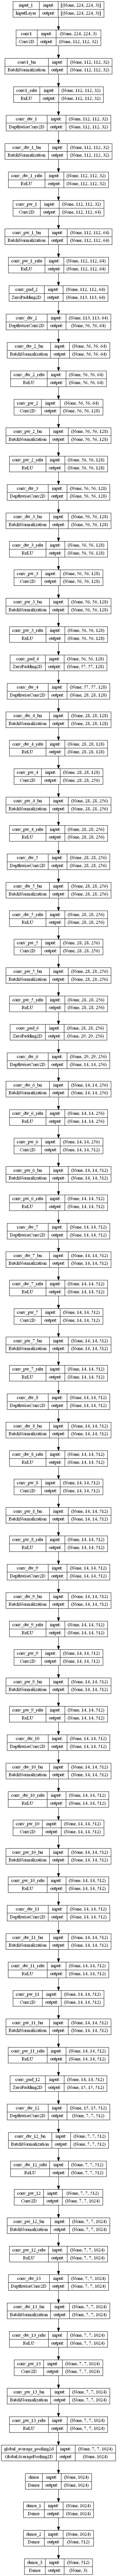

In [10]:
import keras
import pydot
import pydotplus
from pydotplus import graphviz
from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [2]:
from keras.preprocessing.image import ImageDataGenerator

train_data_dir = 'dataset/train'
validation_data_dir = 'dataset/test'

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# set our batch size (typically on most mid tier systems we'll use 16-32)
batch_size = 32
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

Found 466 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [3]:
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping

                     
checkpoint = ModelCheckpoint("face recognisation.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

# Enter the number of training and validation samples here
nb_train_samples = 466
nb_validation_samples = 120

# We only train 10 EPOCHS 
epochs = 5
batch_size = 32

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

C:\Users\kavya\AppData\Local\Temp\ipykernel_4400\1531851897.py:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
14/14 [==============================] - ETA: 0s - loss: 1.4859 - accuracy: 0.6705
Epoch 1: val_loss improved from inf to 0.19252, saving model to face recognisation.h5
14/14 [==============================] - 14s 856ms/step - loss: 1.4859 - accuracy: 0.6705 - val_loss: 0.1925 - val_accuracy: 0.9583
Epoch 2/5
14/14 [==============================] - ETA: 0s - loss: 0.3943 - accuracy: 0.8963
Epoch 2: val_loss improved from 0.19252 to 0.10520, saving model to face recognisation.h5
14/14 [==============================] - 12s 824ms/step - loss: 0.3943 - accuracy: 0.8963 - val_loss: 0.1052 - val_accuracy: 0.9688
Epoch 3/5
14/14 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 1.0000
Epoch 3: val_loss improved from 0.10520 to 0.04068, saving model to face recognisation.h5
14/14 [==============================] - 13s 894ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0407 - val_accuracy: 0.9792
Epoch 4/5
14/14 [==============================] - ETA: 0s 

In [4]:
from keras.models import load_model

classifier = load_model('face recognisation.h5')

In [5]:
import os
import cv2
#from google.colab.patches import cv2_imshow
import numpy as np
from os import listdir
from os.path import isfile, join

monkey_breeds_dict = {"[0]": " kavya ", 
                      "[1]": "sushma",
                      "[2]":"uppi"
                      }

monkey_breeds_dict_n = {"kavya": "kavya", 
                      "uppi": "uppi",
                        "sushma":"sushma"
                      }

def draw_test(name, pred, im):
    monkey = monkey_breeds_dict[str(pred)]
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 80, 0, 0, 100 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, monkey, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1,(255, 0, 0), 2)
    cv2.imshow('HII',expanded_image)

def getRandomImage(path):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    print("Class - " + monkey_breeds_dict_n[str(path_class)])
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    return cv2.imread(file_path+"/"+image_name)    

for i in range(0,10):
    input_im = getRandomImage("dataset/test/")
    input_original = input_im.copy()
    input_original = cv2.resize(input_original, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
    
    input_im = cv2.resize(input_im, (224, 224), interpolation = cv2.INTER_LINEAR)
    input_im = input_im / 255.
    input_im = input_im.reshape(1,224,224,3) 
    
    # Get Prediction
    res = np.argmax(classifier.predict(input_im, 1, verbose = 0), axis=1)
    true_classes=validation_generator.classes
    
    # Show image with predicted class
    draw_test("Prediction", res, input_original) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

Class - kavya
Class - sushma
Class - uppi
Class - sushma
Class - kavya
Class - uppi
Class - sushma
Class - kavya
Class - kavya
Class - sushma


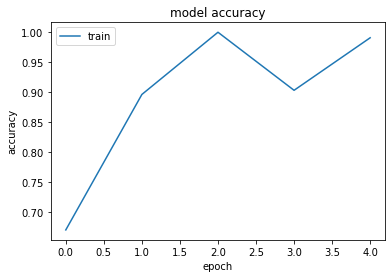

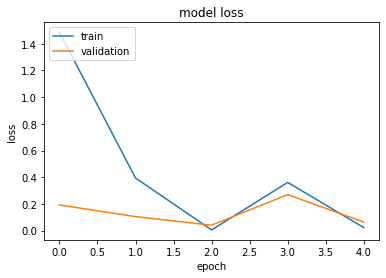

In [6]:
# #Some visualizations
import matplotlib.pyplot as plt
# #Loss
# plt.plot(history.history['loss'],label='loss')
# plt.plot(history.history['val_loss'],label='val_loss')
# plt.legend()
# plt.show()
# #Accuracy
# plt.plot(history.history['accuracy'],label='acc')
# plt.plot(history.history['val_accuracy'],label='val_acc')
# plt.legend()
# plt.show()
# accuracy
#plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [7]:
validation_steps = 5

loss0,accuracy0 = model.evaluate(validation_generator, steps = validation_steps)
model.evaluate(validation_generator,steps = 3)
print("loss: {:.2f}".format(loss0))
print("accuracy: {:.2f}".format(accuracy0))

4/5 [=======================>......] - ETA: 0s - loss: 0.0725 - accuracy: 0.9833WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 5 batches). You may need to use the repeat() function when building your dataset.


3/3 [==============================] - 2s 495ms/step - loss: 0.0698 - accuracy: 0.9896
loss: 0.07
accuracy: 0.98


In [8]:
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [9]:
test_steps_per_epoch = np.math.ceil(validation_generator.samples / validation_generator.batch_size)

predictions = model.predict_generator(validation_generator, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = [1 * (x[0]>=0.5) for x in predictions]

# 2.Get ground-truth classes and class-labels
true_classes = tr_generator.classes
class_labels = list(validation_generator.class_indices.keys()) 

# 3. Use scikit-learn to get statistics
from sklearn.metrics import confusion_matrix,classification_report

print(class_labels)
print("confusion matrix")
print(confusion_matrix(validation_generator.classes, predicted_classes))
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

C:\Users\kavya\AppData\Local\Temp\ipykernel_4400\1358174497.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(validation_generator, steps=test_steps_per_epoch)


['kavya', 'sushma', 'uppi']
confusion matrix
[[27 13  0]
 [31  9  0]
 [21 19  0]]
              precision    recall  f1-score   support

       kavya       0.34      0.68      0.45        40
      sushma       0.22      0.23      0.22        40
        uppi       0.00      0.00      0.00        40

    accuracy                           0.30       120
   macro avg       0.19      0.30      0.23       120
weighted avg       0.19      0.30      0.23       120



C:\Users\kavya\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kavya\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kavya\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
`       